# Histopatologic Tissues images classification
* This nootebook process the images of Histopatologic images Dataset.
* Include the py files of the project in google drive  and add them as sys.path.append.
* Include the dataset for mass detection to google drive and load it path as the variable path.
* Use the generated CSV of the project that contains the features of the masses.
* The components to process new images are loaded in this notebook

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/HISTO')

In [3]:
!pip install mahotas
!pip install pyradiomics 
!pip install SimpleITK 

## Prepare the datasets 


In [4]:
from feature_extraction.training_data import prepate_datasets
path_train = 'gdrive/My Drive/dataset_hist/train'
prepate_datasets(path_train, "train.csv")

  0%|          | 0/26216 [00:00<?, ?it/s]

Preparing training set!



  7%|▋         | 1906/26216 [04:05<56:21,  7.19it/s]/content/gdrive/My Drive/HISTO/preprocessing/preprocessing.py:146: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(ODhat.T)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
 26%|██▌       | 6777/26216 [29:07<2:20:29,  2.31it/s]/content/gdrive/My Drive/HISTO/preprocessing/preprocessing.py:192: RuntimeWarning: overflow encountered in exp
  Inorm = np.multiply(io, np.exp(-HERef.dot(C2)))
/content/gdrive/My Drive/HISTO/preprocessing/preprocessing.py:201: RuntimeWarning: overflow encountered in exp
  E = np.multiply(io, np.exp(np.expand_dims(-HERef[:, 1], axis=1).dot(np.expand_dims(C2[1, :], axis=0))))
 45%|████▌     | 11919/26216 [1:04:54<1:40:20,  2.37it/s]

,Name,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213
0,b_trainImage0.png,b0,107.196021,0.785398,1.0,0.0,1.0,0.203342,0.071398,0.121745,0.019097,0.063151,0.000109,0.013780,0.016276,0.043837,0.000000,0.010634,0.0,0.011719,0.010851,0.050564,0.011610,0.085720,0.0,0.000109,0.000109,0.0,0.000217,0.000217,0.000217,0.012370,0.010417,0.000109,0.002604,0.0,0.0,0.015408,0.0,0.055447,...,0.009874,0.009657,0.012587,0.001302,0.010417,0.009766,0.022895,0.018446,0.003581,0.055990,0.041558,0.000141,2290.990122,0.619761,3012.920633,0.045539,269.705032,9760.692411,8.511133,13.382257,0.000037,6.575429,-0.227789,0.983823,781.801520,0.109377,6.375772,63.973359,2.207343,158.837479,0.051352,0.025943,4.265563,4673.701134,0.653686,0.775608,0.543921,0.836157,53.438147,0.021955
0,b_trainImage1000.png,b0,107.196021,0.785398,1.0,0.0,1.0,0.208767,0.068468,0.113715,0.017361,0.062500,0.000109,0.011610,0.010200,0.039605,0.000000,0.012044,0.0,0.011393,0.010308,0.048828,0.011936,0.090929,0.0,0.000217,0.000109,0.0,0.000434,0.000217,0.000217,0.010742,0.008247,0.000109,0.003147,0.0,0.0,0.019640,0.0,0.054145,...,0.009549,0.011285,0.017361,0.000109,0.008789,0.005751,0.020182,0.013780,0.014757,0.064887,0.041558,0.000240,4131.947337,0.499771,4129.942942,0.039246,346.178785,12387.824432,8.547717,13.138493,0.000024,6.990779,-0.202486,0.973657,850.889571,0.115110,7.542963,81.106666,1.896889,163.206649,0.043701,0.023090,4.098650,5018.629224,0.678443,0.802083,0.340535,0.850493,67.991994,0.019519
0,b_trainImage10002.png,b0,107.196021,0.785398,1.0,0.0,1.0,0.191515,0.081706,0.115668,0.016927,0.062391,0.000217,0.013238,0.010525,0.034722,0.000000,0.008789,0.0,0.011936,0.012044,0.050781,0.013021,0.086589,0.0,0.000217,0.000109,0.0,0.000109,0.000434,0.000109,0.009115,0.011285,0.000109,0.003689,0.0,0.0,0.020508,0.0,0.058919,...,0.008681,0.011827,0.031359,0.000434,0.007053,0.009223,0.027669,0.013780,0.005100,0.044379,0.024957,0.000167,4405.129122,0.361266,3448.457440,0.034808,349.935315,9388.700639,8.453149,13.260064,0.000022,7.048936,-0.193036,0.970073,867.948029,0.115298,6.660615,80.458371,1.797653,152.406886,0.038063,0.022392,4.049447,5246.681021,0.696638,0.816813,0.297212,0.860930,68.413456,0.019535
0,b_trainImage10003.png,b0,107.196021,0.785398,1.0,0.0,1.0,0.195747,0.067817,0.120334,0.015842,0.072917,0.000000,0.014540,0.012804,0.042318,0.000000,0.007812,0.0,0.013129,0.009006,0.047635,0.013672,0.092231,0.0,0.000326,0.000217,0.0,0.000326,0.000326,0.000000,0.009657,0.011827,0.000217,0.003255,0.0,0.0,0.016602,0.0,0.061632,...,0.008681,0.015191,0.018663,0.002930,0.007595,0.003906,0.018555,0.012587,0.010091,0.044922,0.048611,0.000130,4298.905536,0.386073,3501.170091,0.033923,278.429125,9705.774827,8.522030,13.382430,0.000024,7.010062,-0.192527,0.970648,824.479718,0.110425,6.770549,58.597569,1.823534,100.526993,0.060147,0.030355,4.097403,5115.113605,0.684704,0.810167,0.298394,0.854240,51.112916,0.025207
0,b_trainImage10006.png,b0,107.196021,0.785398,1.0,0.0,1.0,0.245009,0.067708,0.102973,0.020074,0.060221,0.000000,0.009766,0.013346,0.031467,0.000000,0.008030,0.0,0.010851,0.008247,0.046441,0.011719,0.098850,0.0,0.000217,0.000000,0.0,0.000326,0.000326,0.000000,0.008355,0.009766,0.000217,0.004557,0.0,0.0,0.017253,0.0,0.052083,...,0.009006,0.013455,0.015734,0.000217,0.002713,0.013997,0.018338,0.014323,0.011176,0.047526,0.050130,0.001131,4204.532227,0.520514,4384.459871,0.116780,364.417899,13333.307257,8.270649,12.415473,0.000056,6.731394,-0.250100,0.985415,739.239637,0.114132,9.379120,96.595175,3.940760,502.541251,0.045805,0.018786,4.320706,4130.395347,0.637659,0.702365,1.908499,0.825649,76.029886,0.016249
0,b_trainImage1001.png,b0,107.196021,0.785398,1.0,0.0,1.0,0.479818,0.071940,0.054362,0.015516,0.036133,0.000109,0.008247,0.004774,0.028429,0.000000,0.003147,0.0,0.

In [4]:
from feature_extraction.training_data import prepate_datasets
path_val = 'gdrive/My Drive/dataset_hist/val'
prepate_datasets(path_val, "val.csv")

  0%|          | 0/3278 [00:00<?, ?it/s]

Preparing training set!



 13%|█▎        | 428/3278 [02:49<17:48,  2.67it/s]/content/gdrive/My Drive/HISTO/preprocessing/preprocessing.py:146: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(ODhat.T)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
100%|██████████| 3278/3278 [21:30<00:00,  2.82it/s]


,Name,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213
0,b_valImage10.png,b0,107.196021,0.785398,1.0,0.0,1.0,0.196072,0.067166,0.108073,0.021267,0.068902,0.000217,0.011176,0.013997,0.034180,0.000000,0.009332,0.000000,0.014214,0.009115,0.051215,0.013238,0.091905,0.0,0.000434,0.000217,0.0,0.000326,0.000434,0.000217,0.010851,0.011285,0.000326,0.003906,0.0,0.0,0.020616,0.0,0.059136,...,0.011827,0.009006,0.023980,0.001411,0.003255,0.009223,0.010851,0.013672,0.008138,0.048394,0.023329,0.000135,5139.009572,0.357311,3998.231031,0.029691,317.253501,10853.914554,8.583362,13.423047,0.000019,7.148597,-0.201562,0.974988,790.354486,0.103041,7.804306,70.208838,1.699247,122.669563,0.045463,0.027385,4.092229,5500.363458,0.716887,0.832275,0.254749,0.872129,61.024854,0.023933
0,b_valImage100.png,b0,107.196021,0.785398,1.0,0.0,1.0,0.198351,0.068251,0.127062,0.015299,0.067166,0.000000,0.012587,0.011285,0.043186,0.000000,0.007270,0.000000,0.011827,0.010959,0.046115,0.014431,0.095920,0.0,0.000217,0.000000,0.0,0.000000,0.000217,0.000000,0.008247,0.010525,0.000760,0.004232,0.0,0.0,0.015516,0.0,0.054145,...,0.008572,0.007921,0.027018,0.000000,0.001085,0.002821,0.007704,0.021701,0.005317,0.042643,0.022678,0.000125,2470.841948,0.704815,4185.070634,0.043741,294.844235,14269.440588,8.596470,13.268858,0.000042,6.548818,-0.230382,0.984005,709.632893,0.106256,7.523381,64.557799,2.623872,180.982819,0.079548,0.029484,4.388254,3971.532299,0.593855,0.724691,0.713275,0.798954,52.033935,0.022666
0,b_valImage1002.png,b0,107.196021,0.785398,1.0,0.0,1.0,0.341363,0.082140,0.089084,0.018555,0.051758,0.000543,0.008247,0.009332,0.034288,0.000109,0.007921,0.000000,0.007704,0.007487,0.031576,0.007812,0.100477,0.0,0.000217,0.000217,0.0,0.000217,0.000217,0.000000,0.005425,0.006619,0.000109,0.002170,0.0,0.0,0.011827,0.0,0.037977,...,0.020508,0.006185,0.031467,0.000000,0.001411,0.007378,0.005859,0.014431,0.015408,0.064345,0.026150,0.007483,1283.382269,0.633404,1750.124813,0.272961,443.949709,5717.116982,6.807419,10.228898,0.000265,5.210398,-0.260562,0.975623,858.611135,0.211505,6.741026,126.453661,18.518472,2675.538429,0.146745,0.016256,4.446043,1777.987130,0.437921,0.439399,13.272459,0.687707,81.121944,0.012561
0,b_valImage1003.png,b0,107.196021,0.785398,1.0,0.0,1.0,0.207140,0.055013,0.116319,0.015625,0.077257,0.000217,0.010634,0.011502,0.039714,0.000000,0.007487,0.000000,0.011719,0.007595,0.046332,0.013455,0.103624,0.0,0.000217,0.000000,0.0,0.000217,0.000434,0.000000,0.008572,0.009332,0.000543,0.003906,0.0,0.0,0.016927,0.0,0.052951,...,0.007704,0.013997,0.018012,0.000217,0.006076,0.006293,0.021267,0.018338,0.003255,0.057617,0.034288,0.000226,4657.699987,0.499271,4650.989854,0.042325,309.701230,13946.259431,8.642649,13.219207,0.000025,7.036199,-0.209630,0.976981,754.515807,0.103883,8.615122,69.219301,1.993080,140.763568,0.061651,0.030031,4.215714,4809.637415,0.661459,0.788005,0.378533,0.840587,58.168719,0.024916
0,b_valImage1006.png,b0,107.196021,0.785398,1.0,0.0,1.0,0.192817,0.065755,0.115017,0.020291,0.070964,0.000326,0.013997,0.012587,0.035373,0.000000,0.009115,0.000000,0.010525,0.010851,0.056966,0.012478,0.093967,0.0,0.000000,0.000434,0.0,0.000109,0.000326,0.000000,0.011285,0.010200,0.000868,0.003581,0.0,0.0,0.019206,0.0,0.060764,...,0.006510,0.019857,0.020074,0.000109,0.012912,0.002604,0.021593,0.011285,0.005751,0.053060,0.037109,0.000106,4921.633723,0.418692,4233.257756,0.028320,295.106220,12011.397300,8.669409,13.512169,0.000021,7.112501,-0.211500,0.979274,757.252961,0.099429,7.929333,65.136588,1.724291,111.102050,0.055322,0.031698,4.157264,5383.058906,0.706517,0.826416,0.259069,0.866470,56.716499,0.027369
0,b_valImage1007.png,b0,107.196021,0.785398,1.0,0.0,1.0,0.198242,0.073351,0.121853,0.016385,0.071506,0.000000,0.013455,0.013346,0.042969,0.000000

## Open the datasets

In [0]:
import pandas as pd
train_data = pd.read_csv('gdrive/My Drive/dataset_hist/train/train.csv')
val_data = pd.read_csv('gdrive/My Drive/dataset_hist/val/val.csv')
X_train = train_data.iloc[:, 3:].to_numpy()
Y_train = (train_data.iloc[:, 2] == 'm0').to_numpy() * 1
X_val = val_data.iloc[:, 3:].to_numpy()
Y_val = (val_data.iloc[:, 2] == 'm0').to_numpy() * 1

## XG Boost CLASSIFIER

In [0]:
import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score

*   Set the parameters of the XGBoost classifier
*   Calculate the ratio between both classes and assign it to a parameter.





In [15]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
params = {
    'objective':'binary:logistic',
    'max_depth':10,
    'silent':1,
    'eta':1
}
num_rounds = 50
train_labels = dtrain.get_label()
ratio = 0.5
#float(np.sum(train_labels == 0)) / np.sum(train_labels == 1)
params['scale_pos_weight'] = ratio
bst_model = params, num_rounds
print(ratio)

0.5


#### Model Training 

In [0]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_val)

params, num_rounds = bst_model

bst = xgb.train(params, dtrain, num_rounds)
probability = bst.predict(dtest)

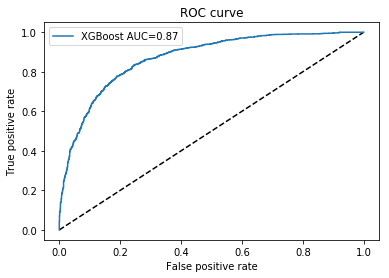

In [17]:
from sklearn.metrics import roc_curve, auc,accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y_val, probability)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='XGBoost AUC='+'{0:.2f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [18]:
print(accuracy_score(Y_val, probability>0.5))
confusion_matrix(Y_val, probability>0.5)

0.786150091519219


array([[1391,  248],
       [ 453, 1186]])